In [192]:
from hazm import Normalizer, PersicaReader, word_tokenize

In [193]:
import matplotlib.pyplot as plt
import numpy as np

### Utilities

In [160]:
def get_key(val, dictionary):
    for key, value in dictionary.items():
         if val == value:
            return key
        
def kmax(dictionary,k=10):
    k_max = {}
    _dict = dictionary.copy()
    for i in range(k):
        _kmax = max(_dict.values())
        key = get_key(_kmax,_dict)
        k_max[key] = _kmax
        _dict.pop(key)
    return k_max

### Dataset - Loading

In [5]:
persica = PersicaReader('corpora/persica.csv')
def load(persica):
    dataset = ''
    for text in persica.texts():
        dataset += text
    return dataset
dataset = load(persica)

### Preprocess

In [55]:
punctuations = '''abcdefghijklmnopkrstuvwxyz!()-[]{};:'"\,<>./?@#$%^&*_~1234567890،؛؟'''
alphabet = ['آ', 'ا', 'ب', 'پ', 'ت', 'س', 'ج', 'چ', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'ژ',
              'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'گ', 'ک', 'ف', 'ق', 'ل', 'م','ن', 'و', 'ه', 'ی']
def punctuation(text, punctuations):
    for char in punctuations:
        text = text.replace(char, '')
        text = text.replace('\u200c', '')
    return text
dataset = punctuation(text=dataset, punctuations=punctuations)

### letters frequency

In [ ]:
def single_letters(text):
    single = {}
    for letter in text:
        if letter not in single.keys():
            single[letter] = 1
        else:
            single[letter]+=1
    return single
single = single_letters(text=dataset)

alphabet_frequency = {}
for key, value in single.items():
    if key in alphabet:
        alphabet_frequency[key] = value
alphabet

{'و': 1077227,
 'ز': 395592,
 'ر': 1548597,
 'ع': 256771,
 'ل': 469381,
 'م': 1038396,
 'د': 1306146,
 'ج': 217349,
 'ا': 2795627,
 'س': 555056,
 'ت': 884677,
 'ن': 1291441,
 'ه': 1114479,
 'ش': 480706,
 'گ': 257452,
 'ف': 256347,
 'ظ': 45306,
 'ح': 186178,
 'ب': 769507,
 'ق': 219953,
 'خ': 216698,
 'ص': 123949,
 'آ': 121403,
 'چ': 53275,
 'ط': 104225,
 'پ': 103132,
 'ض': 60121,
 'ذ': 34385,
 'ژ': 16399,
 'غ': 30654,
 'ک': 20179}

In [154]:
def double_letters(text):
    double = {}
    for i in range(len(text)):
        if text[i:i+1] == ' ' or text[i+1:i+2] == ' ':
            continue
        if text[i:i + 2] not in double.keys():
            if len(text[i:i + 2]) != 1:
                double[text[i:i + 2]] = 1
        else:
            double[text[i:i + 2]] += 1
    return double
double = double_letters(text=dataset)

double_frequency = {}
for key, value in double.items():
    if key[0] in alphabet and key[1] in alphabet:
         double_frequency[key] = value
double_frequency

{'وز': 44650,
 'عل': 30567,
 'لو': 17314,
 'وم': 26484,
 'در': 219583,
 'جم': 19604,
 'مع': 31753,
 'اس': 167224,
 'ست': 174405,
 'تا': 80802,
 'اد': 125315,
 'دا': 207439,
 'ان': 429795,
 'نم': 26286,
 'مو': 64883,
 'ون': 58788,
 'نه': 67051,
 'شو': 59021,
 'ور': 120369,
 'گف': 27618,
 'فت': 62309,
 'از': 164227,
 'نت': 26769,
 'تظ': 3203,
 'ظا': 12481,
 'ار': 274052,
 'رو': 91112,
 'ود': 122809,
 'رد': 141613,
 'نا': 94182,
 'مح': 18529,
 'حو': 9722,
 'تم': 25417,
 'ما': 154306,
 'لم': 21434,
 'را': 274952,
 'به': 169299,
 'عن': 13938,
 'نو': 44353,
 'وا': 108322,
 'بح': 4638,
 'فر': 45123,
 'ره': 60576,
 'هن': 27417,
 'نگ': 39683,
 'نش': 53985,
 'شگ': 21640,
 'گا': 55107,
 'اه': 91878,
 'هه': 32542,
 'ها': 191702,
 'تو': 55573,
 'وس': 22744,
 'سع': 6252,
 'عه': 18860,
 'نق': 16408,
 'بخ': 10289,
 'خش': 9914,
 'شن': 20037,
 'ند': 173685,
 'گز': 26201,
 'زا': 65973,
 'رش': 28212,
 'سر': 23618,
 'صن': 6573,
 'نف': 13181,
 'آم': 23774,
 'زش': 18211,
 'خب': 19459,
 'بر': 123513,
 'رگ': 2

### useful information

In [162]:
size = 0
kmost_l = 0
kmost_d = 0
k = 10
for letter in alphabet:
    size+=dataset.count(letter)
kmost_l = kmax(dictionary=alphabet_frequency, k=10)
kmost_d = kmax(dictionary=double_frequency, k=10)
print(f'corpera size: {size}\n')
print(f'{k} most frequent letters in Persian')
print(kmost_l, '\n')
print(f'{k} most double frequent letters in Persian')
print(kmost_d)

corpera size: 16605664

10 most frequent letters in Persian
{'ا': 2795627, 'ر': 1548597, 'د': 1306146, 'ن': 1291441, 'ه': 1114479, 'و': 1077227, 'م': 1038396, 'ت': 884677, 'ب': 769507, 'س': 555056} 

10 most double frequent letters in Persian
{'ان': 429795, 'را': 274952, 'ار': 274052, 'در': 219583, 'دا': 207439, 'ها': 191702, 'ست': 174405, 'ند': 173685, 'ام': 172747, 'با': 172249}


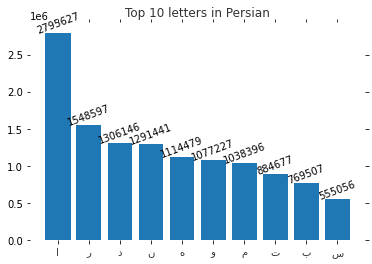

In [188]:
plt.figure()
# change the bar color to be less bright blue
bars = plt.bar(range(len(kmost_l)), list(kmost_l.values()), align='center')
# make one bar, the python bar, a contrasting color
bars[0].set_color('#1F77B4')

# soften all labels by turning grey
plt.xticks(range(len(kmost_l)), list(kmost_l.keys()), alpha=0.8)
# remove the Y label since bars are directly labeled
#plt.ylabel('% Popularity', alpha=0.8)
plt.title(f'Top {k} letters in Persian', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# direct label each bar with Y axis values
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(bar.get_height())), 
                 ha='center', color='black', fontsize=10).set_rotation(20)
plt.show()

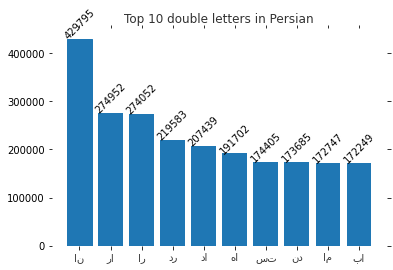

In [191]:
plt.figure()
# change the bar color to be less bright blue
bars = plt.bar(range(len(kmost_d)), list(kmost_d.values()), align='center')
# make one bar, the python bar, a contrasting color
bars[0].set_color('#1F77B4')

# soften all labels by turning grey
plt.xticks(range(len(kmost_d)), list(kmost_d.keys()), alpha=0.8)
# remove the Y label since bars are directly labeled
#plt.ylabel('% Popularity', alpha=0.8)
plt.title(f'Top {k} double letters in Persian', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# direct label each bar with Y axis values
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(bar.get_height())), 
                 ha='center', color='black', fontsize=10).set_rotation(45)
plt.show()